In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, special
import warnings
warnings.filterwarnings('ignore')

## 1차원 이산형 확률변수
    이산형이란?
    취할 수 있는 값이 이산적인 확률변수.
    이산적이라는 말은 대충 그 값이 정수라고 생각하면 쉽다.

#### 확률질량함수(probability mass function, PMF)
확률변수 $X$가 취할 수 있는 값에 대한 집합을 $\{x_1,x_2,...\}$로 정의할 때,<br>확률변수$X$가 $x_k$라는 값을 취하는 확률은 다음과 같다.<br>
$P(X=x_k) = p_k$       $(k = 1,2,...)$<br>이때 확률은 $f(x) = P(X=x)$로 나타낼 수 있다.
<br><br>

#### 확률분포(probability distribution)
확률변수가 취할 수 있는 값과 그 확률의 구체적인 대응(1:1이 될 수도 있고...)
<br><br>

- 확률의 성질
    - 확률의 총합은 1이다.<br>모든 사건이 일어난다면 '사건이 일어난다(=1)'라는 명제만 남는다.
    - 확률은 무조건 0 이상이다.<br>확률의 가장 낮은 값은 '일어나지 않는 것(=0)'이다.
    
<br><br>
#### 누적분포함수(cumulative distribution function, CDF)
$F(x) = P(X\leq x) = $$\displaystyle\sum_{x_k\leq x} f(x_k)$<br>
확률변수 $X$가 $x$가 될 때까지의 확률을 모두 더한 것.<br>가장 마지막 요소까지의 합은 1이다.
<br><br>

#### 확률변수의 변환
확률변수 $X$를 수식을 통해 다른 값으로 변환해도 확률변수로서의 성질은 유지된다.<br>확률변수만 바꾼다면 각 개체에 할당된 확률은 유지되므로, 평균(기댓값)이 선형성을 지니게 된다.

In [2]:
# 먼저, 확률변수의 집합을 만들어 보자.
# 1~6까지의 눈을 가진 불공정 주사위 모델을 다시 가져온다.
xset = [1,2,3,4,5,6]

# 주사위의 확률함수를 정의하자.
def f(x):
    if x in xset:
        return x/21
    else: 0

# 주사위(확률변수)가 가질 수 있는 값의 집합과 확률함수를 세트로 만든 것이 확률분포
X = [xset, f]

In [3]:
# 주사위의 각 눈이 나올 확률(probability)을 배열로 만들어 보자.
prob = np.array([f(x) for x in xset])

# 각 눈과 그게 나올 확률을 묶어서 딕셔너리로 나타내 볼까?
dict(zip(xset,prob))

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

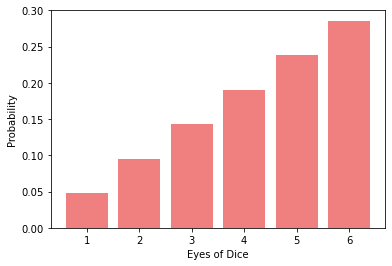

In [4]:
# 시각화 하는 습관을 들이자.
plt.bar(xset,prob,color='lightcoral')
plt.xlabel('Eyes of Dice')
plt.ylabel('Probability')
plt.show()

In [5]:
# 우리가 만든 확률이 타당한지 검증해 보자.
display(np.all(prob>=0), np.sum(prob).round(2))

True

1.0

In [6]:
# 누적분포함수를 만들어 보자.
def cdf(x):
    return np.sum([f(i) for i in xset if i<=x]) # x도 포함한다잉
display(cdf(3), np.sum([f(1),f(2),f(3)]))

0.2857142857142857

0.2857142857142857

### 1차원 이산형 확률변수의 지표
<br>

#### 기댓값(평균, expected value)
$E(X) = $$\displaystyle\sum_{k} x_kf(x_k)$
<br>

    이것은 특이하게도 총합을 데이터의 수로 나누는 게 아닌,
    확률변수가 가질 수 있는 값과 확률의 곱의 총합으로 나타낸다.
    따라서 np.sum 함수를 쓸 것이고, 이에 대해 np.mean 함수를 안 쓴다고 헷갈려하면 안 되는 것이다.
- 기댓값의 선형성
    $E(aX + b) = aE(X) + b$
<br><br>

#### 분산(variance)
$V(X) = $$\displaystyle\sum_{k} (x_k-\mu)^2f(x_k)$
<br>
    
    이것 역시 편차 제곱의 평균을 확률의 기댓값처럼 편차 제곱의 합으로 나타내었다.
    함수를 np.mean 대신 np.sum을 쓴다는 것만 기억한다면 어렵지 않을 것이다.

In [7]:
# 확률변수를 변환해 보고, 기댓값의 선형성을 검증해 보자.
# 데이터 표준화의 기본인 만큼 변환은 10X+50으로 해볼까?
# x를 g(x)로 치환하는 것이니 x가 일어날 확률 x*f도 g(x)*f가 되는 것이지.

def E(X,g = lambda x:x): # expectation
    xset, f = X
    return np.sum([g(x)*f(x) for x in xset])

display(E(X),E(X,lambda x:10*x+50),10*E(X)+50)

4.333333333333333

93.33333333333333

93.33333333333333

In [8]:
# 변환함수를 고려한 분산을 사용자함수로 나타내 보고, 연산을 수행하 보자.

def V(X,g=lambda x:x):
    xset,f = X
    return np.sum([(g(x)-E(X,g))**2 *f(x) for x in xset])

display(V(X), V(X, lambda x:(10*x+50)), 10**2*V(X))
# 분산의 경우 제곱의 합이므로 변환함수에서 x에 곱해주는 인자값을 제곱해 주고,
# 상수의 경우 똑같이 움직이는 편차라고 생각하면 되므로 분산은 선형적이진 않음.

2.2222222222222223

222.22222222222223

222.22222222222223

## 2차원 이산형 확률변수
<br>

#### 결합확률분포
$P(X = x_i, Y = y_j) = p_{ij}$

    확률변수 x와 y의 움직임을 동시에 고려한 분포.
    결합분포라고도 부른다.
<br>

- 2차원 이산형 확률변수의 확률적 성질
    * 이것 역시 확률적 성질은 동일해서, 총합은 1이고 모든 확률의 값이 0 이상이다.
<br><br>

#### 주변확률분포(marginal probability distribution)
$f_X(x) = $$\displaystyle\sum_{k} f_{XY}(x,y_k)$

    x와 y 두 가지 변수로 정의되는 결합확률분포에서
    한 가지 변수의 확률분포에만 관심이 있다면,
    나머지 한 변수의 가짓수를 모두 대입해서 그 영향을 없앤 후 총합을 구하면 된다.

<br>

In [9]:
# 이번엔 불공정 주사위 2개를 꺼내들었다.
# 두 주사위 눈의 합을 x, 하나를 굴려 나온 눈의 수를 y라고 하자.
xset = np.arange(2,13) # 11개의 가짓수가 있다
yset = np.arange(1,7) # 6개의 경우의 수가 있다

def f_XY(x,y):
    if 1<=y<=6 and 1<=x-y<=6:
        return (y/21)*((x-y)/21)
    else: return 0

XY = [xset, yset, f_XY]

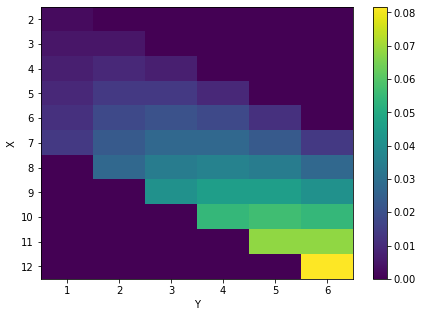

In [10]:
# 주사위를 굴려 나오는 확률을 히트맵으로 그려보자.
# 이 때, X를 먼저 정하든 Y를 먼저 정하든 나머지 한 수가 결정되는 경우는 동일하므로
# 일단 주사위 하나를 먼저 굴리는 방식으로 Y를 먼저 정했다고 치자.

prob = np.array([[f_XY(x,y) for y in yset] for x in xset])

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
c = ax.pcolor(prob)
ax.set_xlabel('Y')
ax.set_ylabel('X')
ax.invert_yaxis()
ax.set_xticks(np.arange(prob.shape[1])+0.5, yset)
ax.set_yticks(np.arange(prob.shape[0])+0.5, xset)
fig.colorbar(c, ax=ax)
plt.show()

In [11]:
# 확률의 성질을 검증해 보자
display(np.all(prob>=0), np.sum(prob).round(2))

True

1.0

In [12]:
# 주변확률분포를 구하는 함수를 만들어 보자.

def f_X(x):
    return np.sum([f_XY(x,y) for y in yset])
def f_Y(y):
    return np.sum([f_XY(x,y) for x in xset])
# 두 함수 모두 원하는 변수는 놔두고 나머지 변수의 경우를 바꿔가며 합을 구했다.

X = [xset, f_X]
Y = [yset, f_Y]

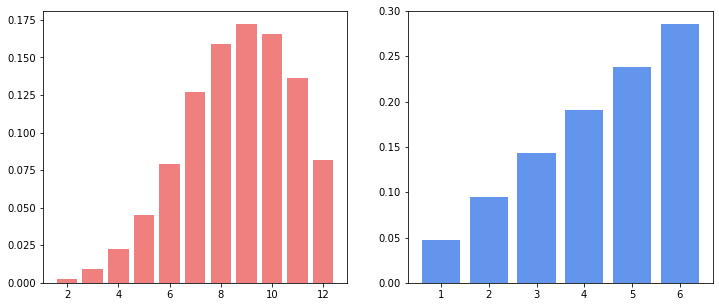

In [13]:
# 항상 시각화하는 습관!!

px = np.array([f_X(x) for x in xset]) # y의 영향을 배제한 함수이니 x 값만 바꿔가며
py = np.array([f_Y(y) for y in yset]) # 이것도 같은 원리

fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(xset, px, color='lightcoral')
ax2.bar(yset, py, color='cornflowerblue')
plt.show()

### 2차원 이산형 확률변수의 지표
<br>

- 기댓값(평균)<br>
$\mu_x = E(X) = $$\displaystyle\sum_{i} $$\displaystyle\sum_{k} x_if_{XY}(x_i,y_j)$

#### 베르누이 분포(Bernoulli dirstribution)
    확률변수가 취할 수 있는 값이 0과 1밖에 없는 분포.
$f(x) = p^x(1-p)^{(1-x)}$      $(x\in \{0,1\})$
- 파라미터는 $p$로서, 성공 확률을 뜻한다(0≤$p$≤1).
- 확률변수 $X$에 대하여 $X\~Bern(p)$일 때<br>$E(X)=p$<br>$V(X)=p(1-p)$

In [14]:
# p=0.4인 베르누이 분포를 만들고 기댓값과 분산을 구해 보자.
p = 0.4
rv = stats.bernoulli(p)
print(p, p*(1-p))
print(rv.mean(), rv.var())

0.4 0.24
0.4 0.24


In [17]:
# 위의 베르누이 분포에서 확률질량함수와 누적밀도함수를 살펴 보자.
display(rv.pmf([0,1]), rv.cdf([0,1]))
# 실패 확률 0.6, 성공 확률 0.4
# 0일 때 누적 확률 0.6, 1까지 포함하면 전체 확률이므로 1

array([0.6, 0.4])

array([0.6, 1. ])

#### 이항분포(binomial distribution)
    성공 확률이 p인 베르누이 시행을 n번 했을 때의 성공 횟수가 따르는 분포
$f(x) = _{n}\mathrm{C}_{x}p^x(1-p)^{(n-x)}$   $(x\in \{0,1,$$\cdots$$,n\})$<br>
여기서, $ _{n}\mathrm{C}_{x} =\frac{n!}{x!(n-x)!}$이다.
- 성공 확률이 $p$